In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import scipy
import librosa.display
from IPython.display import Audio
os.system('tar -zxf ../input/train.7z')

512

In [2]:
zero = '../input/train/audio/zero/'
random_zero = zero+os.listdir(zero)[0]
Audio(random_zero)

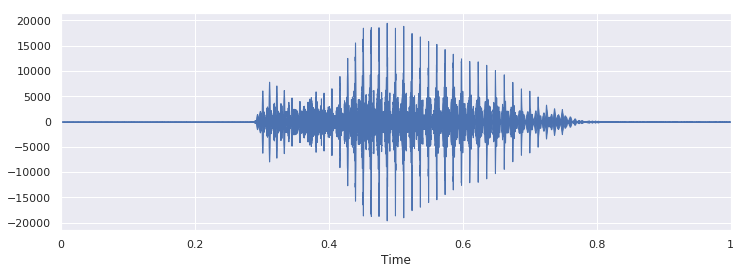

In [50]:
sample_rate, samples = scipy.io.wavfile.read(random_zero)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples.astype('float'), sr=sample_rate)
plt.show()

/opt/conda/lib/python3.6/site-packages/librosa/core/spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


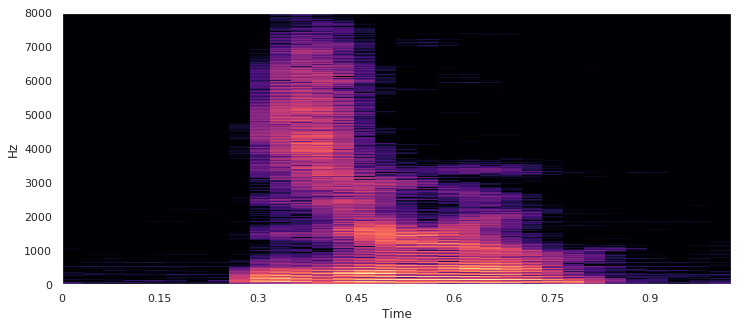

In [52]:
X = librosa.stft(samples.astype('float'))
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.show()

## Change pitch and speed

In [58]:
y_pitch_speed = samples.copy()
# you can change low and high here
length_change = np.random.uniform(low=0.8, high = 1)
speed_fac = 1.0  / length_change
print("resample length_change = ",length_change)
tmp = np.interp(np.arange(0,len(y_pitch_speed),speed_fac),np.arange(0,len(y_pitch_speed)),y_pitch_speed)
minlen = min(y_pitch_speed.shape[0], tmp.shape[0])
y_pitch_speed *= 0
y_pitch_speed[0:minlen] = tmp[0:minlen]
Audio(y_pitch_speed, rate=sample_rate)

resample length_change =  0.8854672988271951


## Change pitch only

In [68]:
y_pitch = samples.copy()
bins_per_octave = 12
pitch_pm = 2
pitch_change =  pitch_pm * 2*(np.random.uniform())   
print("pitch_change = ",pitch_change)
y_pitch = librosa.effects.pitch_shift(y_pitch.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
Audio(y_pitch, rate=sample_rate)

pitch_change =  2.9363180570032563


## Change speed only

In [69]:
y_speed = samples.copy()
speed_change = np.random.uniform(low=0.9,high=1.1)
print("speed_change = ",speed_change)
tmp = librosa.effects.time_stretch(y_speed.astype('float64'), speed_change)
minlen = min(y_speed.shape[0], tmp.shape[0])
y_speed *= 0 
y_speed[0:minlen] = tmp[0:minlen]
Audio(y_speed, rate=sample_rate)

speed_change =  0.9979356751528617


## value augmentation

In [71]:
y_aug = samples.copy()
dyn_change = np.random.uniform(low=1.5,high=3)
print("dyn_change = ",dyn_change)
y_aug = y_aug * dyn_change
print(y_aug[:50])
print(samples[:50])
Audio(y_aug, rate=sample_rate)

dyn_change =  2.2849864231513264
[ 11.42493212  -6.85495927   0.         -13.70991854 -22.84986423
 -15.99490496  -6.85495927  -9.13994569 -13.70991854 -11.42493212
 -20.56487781 -20.56487781 -11.42493212  -2.28498642   4.56997285
  13.70991854  22.84986423  11.42493212  11.42493212  13.70991854
   4.56997285  -2.28498642   4.56997285   4.56997285   6.85495927
   2.28498642   6.85495927  11.42493212  13.70991854  18.27989139
  15.99490496  11.42493212  15.99490496  18.27989139  11.42493212
  18.27989139  20.56487781  20.56487781  15.99490496  20.56487781
  20.56487781  13.70991854  11.42493212  11.42493212  13.70991854
  13.70991854  13.70991854   4.56997285   6.85495927  18.27989139]
[  5  -3   0  -6 -10  -7  -3  -4  -6  -5  -9  -9  -5  -1   2   6  10   5
   5   6   2  -1   2   2   3   1   3   5   6   8   7   5   7   8   5   8
   9   9   7   9   9   6   5   5   6   6   6   2   3   8]


## add distribution noise

In [72]:
y_noise = samples.copy()
# you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
noise_amp = 0.005*np.random.uniform()*np.amax(y_noise)
y_noise = y_noise.astype('float64') + noise_amp * np.random.normal(size=y_noise.shape[0])
Audio(y_noise, rate=sample_rate)

## random shifting

In [73]:
y_shift = samples.copy()
timeshift_fac = 0.2 *2*(np.random.uniform()-0.5)  # up to 20% of length
print("timeshift_fac = ",timeshift_fac)
start = int(y_shift.shape[0] * timeshift_fac)
print(start)
if (start > 0):
    y_shift = np.pad(y_shift,(start,0),mode='constant')[0:y_shift.shape[0]]
else:
    y_shift = np.pad(y_shift,(0,-start),mode='constant')[0:y_shift.shape[0]]
Audio(y_shift, rate=sample_rate)

timeshift_fac =  -0.12732494711350065
-2037


## apply hpss

In [74]:
y_hpss = librosa.effects.hpss(samples.astype('float64'))
print(y_hpss[1][:10])
print(samples[:10])
Audio(y_hpss[1], rate=sample_rate)

[ 1.86334634  0.60460948  0.88883567  0.01433704 -0.53360726 -0.47694444
  0.65080978  0.69553757  0.48178374  0.47946004]
[  5  -3   0  -6 -10  -7  -3  -4  -6  -5]


## Shift silent to the right

In [75]:
samples[(samples > 200) | (samples < -200)]

array([205, 212, 215, ..., 214, 207, 211], dtype=int16)

In [76]:
sampling=samples[(samples > 200) | (samples < -200)]
shifted_silent =sampling.tolist()+np.zeros((samples.shape[0]-sampling.shape[0])).tolist()
Audio(shifted_silent, rate=sample_rate)

## Streching

In [88]:
input_length = len(samples)
streching = samples.copy()
streching = librosa.effects.time_stretch(streching.astype('float'), 1.1)
if len(streching) > input_length:
    streching = streching[:input_length]
else:
    streching = np.pad(streching, (0, max(0, input_length - len(streching))), "constant")
Audio(streching, rate=sample_rate)

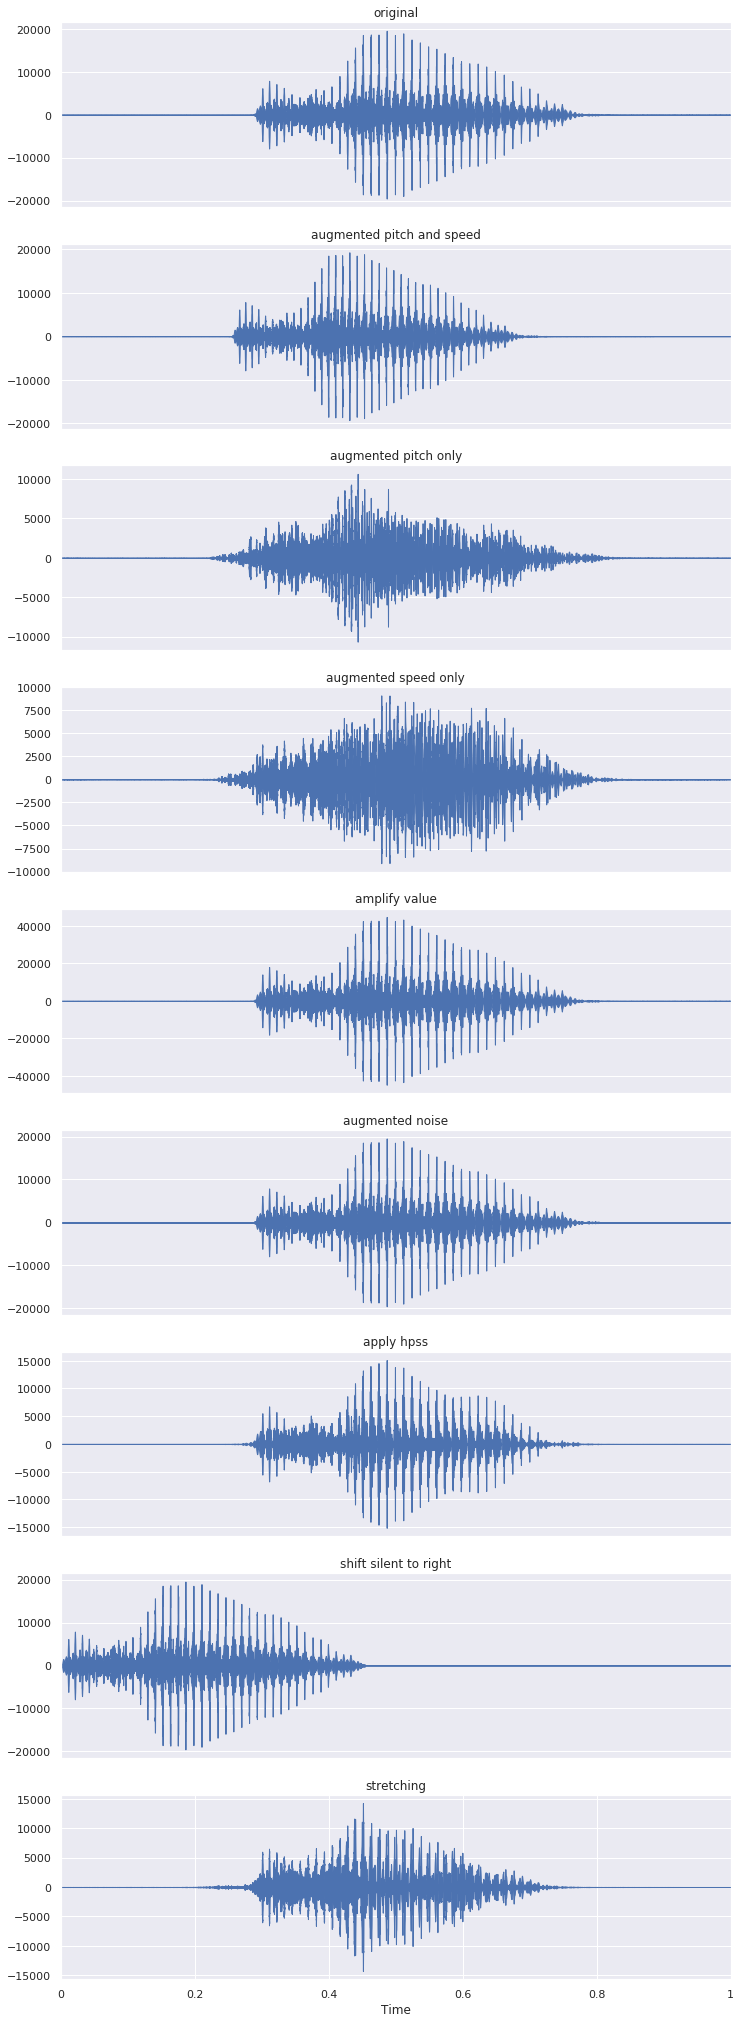

In [89]:
plt.figure(figsize=(12, 4*9))
plt.subplot(9, 1, 1)
librosa.display.waveplot(samples.astype('float'), sr=sample_rate,x_axis=None)
plt.title('original')
plt.subplot(9, 1, 2)
librosa.display.waveplot(y_pitch_speed.astype('float'), sr=sample_rate,x_axis=None)
plt.title('augmented pitch and speed')
plt.subplot(9, 1, 3)
librosa.display.waveplot(y_pitch, sr=sample_rate,x_axis=None)
plt.title('augmented pitch only')
plt.subplot(9, 1, 4)
librosa.display.waveplot(y_speed.astype('float'), sr=sample_rate,x_axis=None)
plt.title('augmented speed only')
plt.subplot(9, 1, 5)
librosa.display.waveplot(y_aug.astype('float'), sr=sample_rate,x_axis=None)
plt.title('amplify value')
plt.subplot(9, 1, 6)
librosa.display.waveplot(y_noise, sr=sample_rate,x_axis=None)
plt.title('augmented noise')
plt.subplot(9, 1, 7)
librosa.display.waveplot(y_hpss[1], sr=sample_rate,x_axis=None)
plt.title('apply hpss')
plt.subplot(9, 1, 8)
librosa.display.waveplot(np.array(shifted_silent).astype('float'), sr=sample_rate,x_axis=None)
plt.title('shift silent to right')
plt.subplot(9, 1, 9)
librosa.display.waveplot(streching, sr=sample_rate)
plt.title('stretching')
plt.show()